<a href="https://colab.research.google.com/github/Aper777/AI/blob/main/PredictingCaliforniaHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Task: Predicting California House Prices with KNN Regression
In this task, you will work with the California Housing Prices dataset to predict the median house value in a given area. This is a regression problem, meaning your model will predict a continuous numerical value.
Your main goal is to explore how the choice of distance metric and the value of k dramatically affect the model's performance, but we'll also go through the critical steps of data cleaning and analysis first.
The dataset is conveniently available directly from the Scikit-learn library, so there's no need to download a file.

1. Load, Inspect, and Clean the Data
Load: Use Scikit-learn's built-in fetch_california_housing function to load the dataset. This will give you the features and target variable separately.
Inspect: The dataset is generally clean, but it's good practice to get to know it. Convert the data into a Pandas DataFrame for easier viewing. Use .head() and .info() to inspect the first few rows and check for any missing values or incorrect data types.
Basic Analysis: Get a feel for the data's distribution. Use .describe() to see the mean, standard deviation, and other statistics for each feature.

In [16]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Step 1: Load the Dataset
california = fetch_california_housing()
# Features (X) and target (y)
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

print('Check dataset head')
print(X.head())
print('Check dataset info')
print(X.info())
print('Check for missing values')
print(X.isnull().sum())
print('Basic statistics')
print(X.describe())



Check dataset head
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Check dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    206

2. Visualize and Analyze Relationships
Visualize Feature Distributions: Create a histogram for one or two of the key features, like MedInc (Median Income). This will help you understand how the data is distributed.
Visualize Relationships: Use a scatter plot to visualize the relationship between a feature and the target variable (MedHouseVal). For example, plot MedInc on the x-axis and MedHouseVal on the y-axis. What kind of relationship do you observe?
Correlation: Calculate the correlation matrix for all the features. This will give you a numerical sense of how strongly each feature relates to the others and to the target variable.

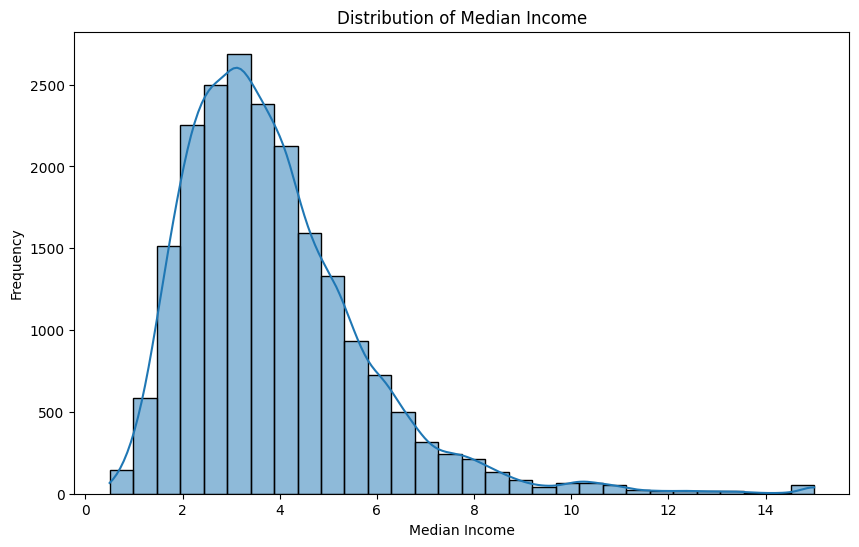

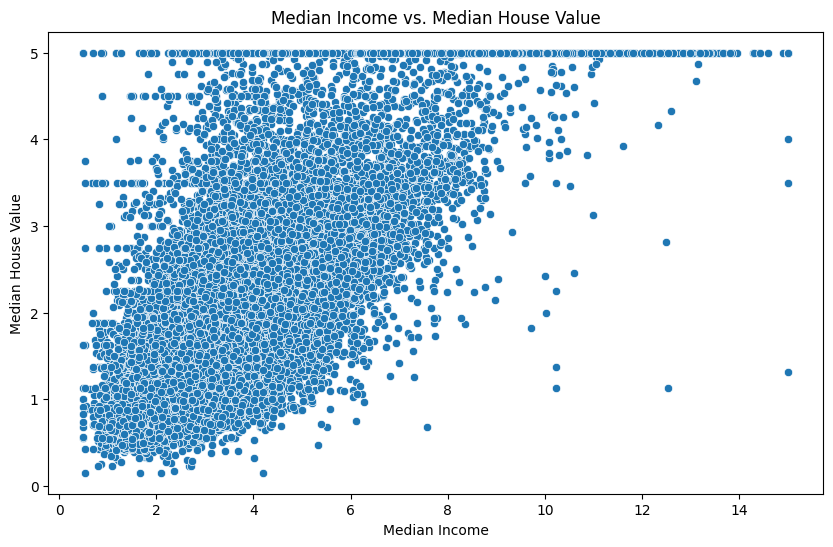

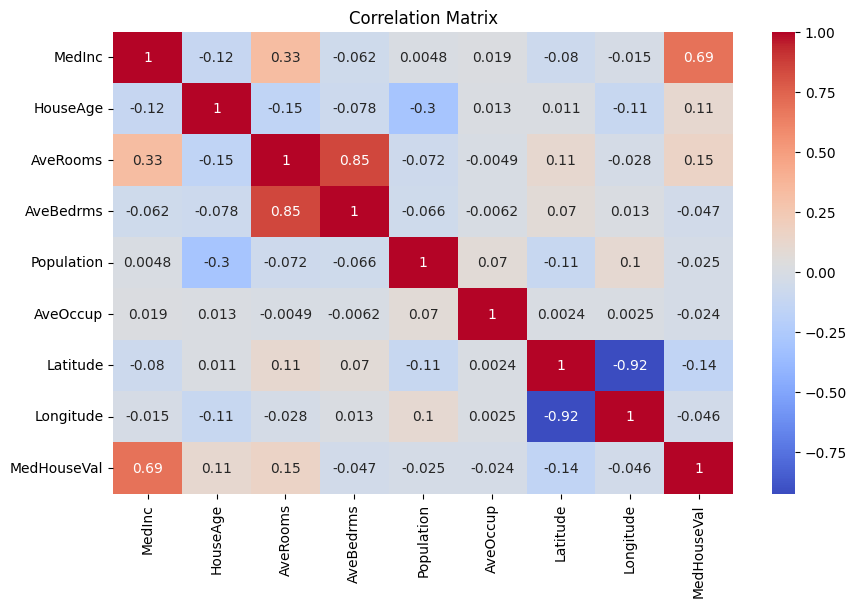

In [14]:
# With a clear schedule (Հստակ գրաֆիկով)
plt.figure(figsize=(10, 6))
sns.histplot(X['MedInc'], bins=30, kde=True)
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

# 2.2 Հարաբերությունների պատկերում (Relationships)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['MedInc'], y=y, data=X)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# 2.3 Կորելացիայի հաշվարկ (Correlation Matrix)
df =X.copy()
df['MedHouseVal'] = y

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


3. Split, Scale, and Train the Model
Split the Data: Separate your data into a training set and a testing set (e.g., an 80/20 split).
Scale the Data: This is a crucial step! Since KNN is distance-based, features with larger values will dominate the distance calculations. Apply a StandardScaler to your training and testing data to ensure all features contribute equally.
Train the Model: Initialize a KNeighborsRegressor from Scikit-learn with a starting value for k (e.g., k=5) and the default distance metric. Fit the model to your scaled training data.

In [20]:
# 3.1 Data Splitting into Train/Test (Տվյալների բաժանում Train/Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3.2 Scaling the Data for KNN(Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3.3 Մոդելի ուսուցում KNN-ով(Model training with KNN)
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


4. Hyperparameter Tuning: Exploring k and Distance Metrics
This is where you'll really dig into the heart of KNN!
Evaluate the Model: Use your trained model to make predictions on the scaled testing data. Calculate and report the Mean Squared Error (MSE) for your predictions.
Tune k:
Create a loop to test a range of k values (e.g., from 1 to 30).
For each k in the loop, train a new KNeighborsRegressor and calculate its MSE.
Plot the MSE against the k value. Based on the graph, what would you say is the optimal value for k?
Explore Distance Metrics:
Now, retrain your model using the optimal k you just found. This time, change the distance metric from the default ('euclidean') to 'manhattan'.
Calculate and report the new MSE. How did the change in the distance metric affect your model's performance?


MSE (k=5, Euclidean): 0.4324216146043236


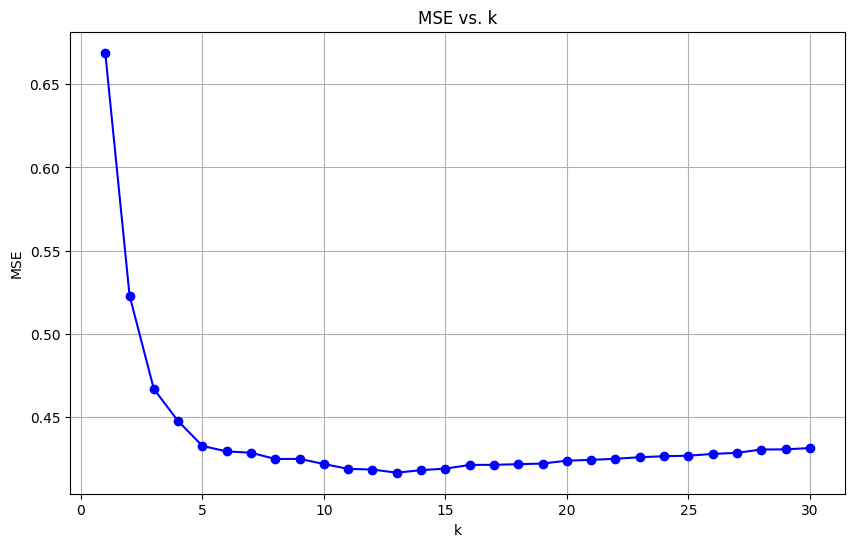

Օպտիմալ k = 12
MSE (Euclidean): 0.4182010634727065
MSE (Manhattan): 0.3721141404497584


In [25]:
# 4.1 Մոդելի գնահատում (Evaluation with MSE)
y_pred = knn.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)


print("MSE (k=5, Euclidean):", mse)

# 4.2 Choosing the best k(Լավագույն k-ի ընտրություն)
mse_values = []
k_values =range(1, 31)

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred_k = model.predict(X_test_scaled)
    mse_k = mean_squared_error(y_test, y_pred_k)
    mse_values.append(mse_k)


plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-', color='b')
plt.title('MSE vs. k')
plt.xlabel('k')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


# 4.3 Distance Metrics-ի ազդեցությունը(The Impact of Distance Metrics)

k_opt = mse_values.index(min(mse_values))
print("Օպտիմալ k =", k_opt)

# Մոդել Euclidean (default)
knn_euclidean = KNeighborsRegressor(n_neighbors=k_opt, metric="euclidean")
knn_euclidean.fit(X_train_scaled, y_train)
mse_euclidian = mean_squared_error(y_test, knn_euclidean.predict(X_test_scaled))


knn_manhattan = KNeighborsRegressor(n_neighbors=k_opt, metric="manhattan")
knn_manhattan.fit(X_train_scaled, y_train)
mse_manhattan = mean_squared_error(y_test, knn_manhattan.predict(X_test_scaled))

print("MSE (Euclidean):", mse_euclidian)
print("MSE (Manhattan):", mse_manhattan)

Now I will also write an R² score calculation so that we have a more intuitive metric (instead of MSE, R² shows “how much percent we explain the target”).

In [28]:
# R² Score (Coefficient of Determination)
r2_euclidean = r2_score(y_test, knn_euclidean.predict(X_test_scaled))
r2_manhattan = r2_score(y_test, knn_manhattan.predict(X_test_scaled))
y_pred_opt = knn_euclidean.predict(X_test_scaled)
mse_opt = mean_squared_error(y_test, y_pred_opt)
r2 =r2_score(y_test, y_pred_opt)
print("MSE (Euclidean):", mse_euclidian)
print("MSE (Manhattan):", mse_manhattan)
print("R² (Euclidean):", r2_euclidean)
print("R² (Manhattan):", r2_manhattan)
print("R²:", r2)

MSE (Euclidean): 0.4182010634727065
MSE (Manhattan): 0.3721141404497584
R² (Euclidean): 0.6808621808787498
R² (Manhattan): 0.7160320582133934
R²: 0.6808621808787498
